# Predicting Stock Prices!

In this element, I will be attempting to predict tesla stock prices using a decision tree regressor. This is something that I didn't specifically cover in my machine learning class this semester, but I used my knowledge of previous algorithms, as well as relying on a few outside sources and the sklearn documentation, to create this. 

I begin by importing all required packages.
- numpy is for array manipulation
- pandas is for dataframe manipulation
- DecisionTreeRegressor is what creates the actual decision tree
- train_test_split easily splits the data into testing and training 
- plt is used for plotting the data

In [1]:
#importing required packages

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data

import matplotlib.pyplot as plt

/Users/sashayeutseyeva/opt/anaconda3/envs/csc294/lib/python3.8/site-packages/sklearn/externals/six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


Now that the packages are loaded, we can begin exploring the data. Below are the first five rows of this tesla stock dataset. The variables are date, the opening price, the highest price of that day, the lowest price of that day, the closing price, the volume of stocks traded, and the adjusted close value.

In [2]:
#reading data
data = pd.read_csv('tesla_stock.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


To better understand this data, it would be easier to plot the stock closing prices over time. plt helps us do this quickly.

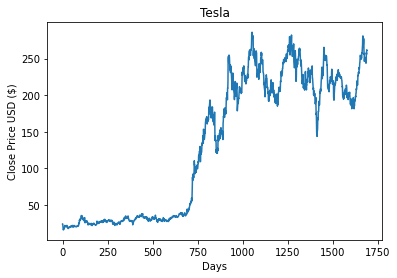

In [3]:
# plt.figure(figsize=(8,6))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(data['Close'])
plt.show()

Throughout this process, we will not be using the date variable. As a result, we drop the date column.

In [4]:
data = data.drop(['Date'], axis=1)

Now that we have the dataset we would like to use, I will be adding a column called 'Prediction'. This column will contain the price that we want to predict, based on the input of that given day. In other words, if we want to predict 10 days into the future, we would take the closing price of observation 11, and put it as the 'Prediction' value of row 1. Because of this, the last 10 days would not have a 'Prediction' value. 

Basically, we are shifting the 'Close' column by x amount of dates, and instead putting these values into a 'Prediction' column in the corresponding observations x days ago.

In [5]:
#This variable represents the number of days into the future we are predicting the prices
future_days = 100
#Now, we create the 'Prediction' column
data['Prediction'] = data[['Close']].shift(-future_days)

Now that we have the dataset that we want to use to train the algorithm, which contains both the explanatory variables and the resulting variable, it is time to divide them up into their corresponding datasets. 

Beginning with the response variables, we can get those by dropping predictions from the dataset. We also need to be careful not to include the observations that do not have a predicted day, and therefore take all of X, except for the last observations, however many days we want to predict into the future. 

As a result, X contains the variables Open, High, Low, Close, Volume, and Adjusted Close.

In [6]:
X = np.array(data.drop(['Prediction'], axis = 1))[:-future_days]
print(X)

[[1.90000000e+01 2.50000000e+01 1.75400010e+01 2.38899990e+01
  1.87663000e+07 2.38899990e+01]
 [2.57900010e+01 3.04200000e+01 2.32999990e+01 2.38300000e+01
  1.71871000e+07 2.38300000e+01]
 [2.50000000e+01 2.59200000e+01 2.02700000e+01 2.19599990e+01
  8.21880000e+06 2.19599990e+01]
 ...
 [1.99740005e+02 2.06660004e+02 1.98059998e+02 2.03559998e+02
  6.99120000e+06 2.03559998e+02]
 [2.02119995e+02 2.03000000e+02 1.97050003e+02 1.99100006e+02
  5.07290000e+06 1.99100006e+02]
 [1.98600006e+02 2.01570007e+02 1.97410004e+02 2.00089996e+02
  2.94340000e+06 2.00089996e+02]]


The same thing is repeated for the result variable, 'Prediction', except this time the only variable taken is the 'Prediction' variable, instead of it being removed. As before, the days without a predicted value must not be included in this array.

In [7]:
y = np.array(data['Prediction'])[:-future_days]
print(y)

[ 29.889999  30.99      33.400002 ... 255.729996 262.049988 261.5     ]


Now that the data is figured out, it is finally time to fit the model! Here, I am using the sklearn implementation of DecisionTreeRegressor, and fitting it to the data. Basically, this is what creates the decision tree. For a visualization, I will create a sample tree with a depth of 3.

In [8]:
#Create the decision tree regressor model
sampleTree = DecisionTreeRegressor(max_depth = 3)

sampleTree.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

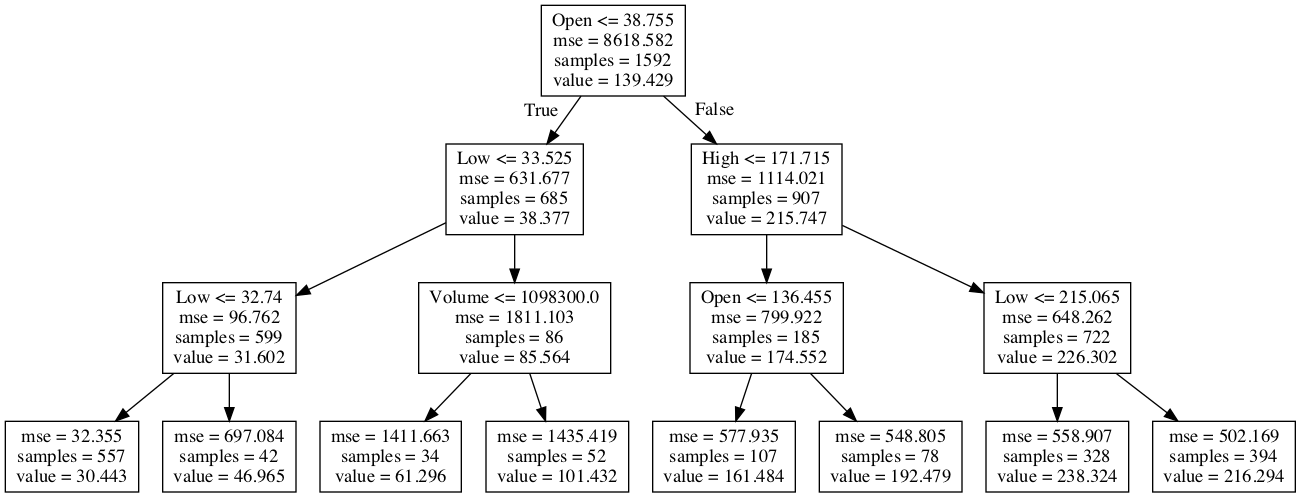

In [9]:
var_names = list(data.columns)[0:6]

dot_data = StringIO()

grape = export_graphviz(sampleTree, out_file=dot_data, feature_names=var_names)
(dt_vis, ) = graph_from_dot_data(dot_data.getvalue())

dt_vis.write_pdf("decisionTreeVisualization.pdf")

Image(dt_vis.create_png())

As you can see, decision trees work by finding logical conditions that best split the data. Following the paths of these logic questions, the tree provides a resulting value, which is the predicted closing price. 

I think a tree with depth 3 is too small to make predictions about stock prices, given the numerical nature of the questions and the numerous outcomes. As a result, I think it's better to create a tree of depth 8. 

In [10]:
#Creating the decision tree regressor model
tree = DecisionTreeRegressor(max_depth = 8)

#fitting the decision tree to the data
tree.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Now that the decision tree is fitted, it is ready to be used for predictions. 

First, I need to get the set of observations that I will be predicting closing prices for. I do this by taking the last part of the dataset, the number equaling the number of days into the future I would like to predict.

In [11]:
#Get the observations that need to be predicted 
# I do this by dropping the 'Prediction' column of the data and only taking the last observations, the number of 
# which equals future_days
x_future = data.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days) 

#Converting this to a numpy array
x_future = np.array(x_future)
x_future

array([[2.19589996e+02, 2.19910004e+02, 2.17110001e+02, 2.18960007e+02,
        2.03280000e+06, 2.18960007e+02],
       [2.20000000e+02, 2.21940002e+02, 2.18009995e+02, 2.18990005e+02,
        2.22900000e+06, 2.18990005e+02],
       [2.18000000e+02, 2.20899994e+02, 2.15449997e+02, 2.20679993e+02,
        2.24950000e+06, 2.20679993e+02],
       [2.22240005e+02, 2.34440002e+02, 2.21520004e+02, 2.32339996e+02,
        6.21360000e+06, 2.32339996e+02],
       [2.33800003e+02, 2.40850006e+02, 2.32610001e+02, 2.35520004e+02,
        5.97200000e+06, 2.35520004e+02],
       [2.34979996e+02, 2.35330002e+02, 2.27059998e+02, 2.29360001e+02,
        4.49210000e+06, 2.29360001e+02],
       [2.27389999e+02, 2.27970001e+02, 2.18419998e+02, 2.18789993e+02,
        6.02660000e+06, 2.18789993e+02],
       [2.19500000e+02, 2.25770004e+02, 2.17660004e+02, 2.17869995e+02,
        4.19300000e+06, 2.17869995e+02],
       [2.18880005e+02, 2.22199997e+02, 2.12529999e+02, 2.14960007e+02,
        3.58020000e+06, 

Now that I have my tree and the data for which the predictions need to be calculated, I can use the tree to predict the closing prices for these observations.

In [12]:
# Predicting the values
tree_prediction = tree.predict(x_future)
print( tree_prediction )

[206.94249919 206.94249919 203.0380002  219.13395817 233.6128886
 221.02033337 206.94249919 208.886668   214.3126678  193.5349965
 204.3050005  214.3126678  206.94249919 206.94249919 188.559998
 249.58903666 214.896248   214.896248   249.58903666 211.12333167
 235.99588371 214.3126678  235.99588371 214.3126678  214.3126678
 214.3126678  219.13395817 181.880005   219.13395817 219.13395817
 206.94249919 219.13395817 221.02033337 221.02033337 219.13395817
 219.13395817 219.13395817 221.02033337 221.02033337 221.02033337
 221.02033337 221.02033337 219.13395817 221.02033337 221.02033337
 221.02033337 221.02033337 221.02033337 221.02033337 234.5479981
 234.5479981  221.02033337 234.5479981  234.5479981  234.5479981
 234.5479981  234.5479981  233.6128886  234.5479981  219.13395817
 206.94249919 264.3199995  235.99588371 235.99588371 240.63192338
 249.58903666 249.58903666 249.58903666 249.58903666 249.58903666
 249.58903666 249.58903666 249.58903666 249.58903666 249.58903666
 249.58903666 249

With the predictions complete, I am ready to visualize the prices. I do this by creating a plot with the training data in blue, the validation data in orange, and the predictions in green. 

<ipython-input-13-b4648cfd48ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices


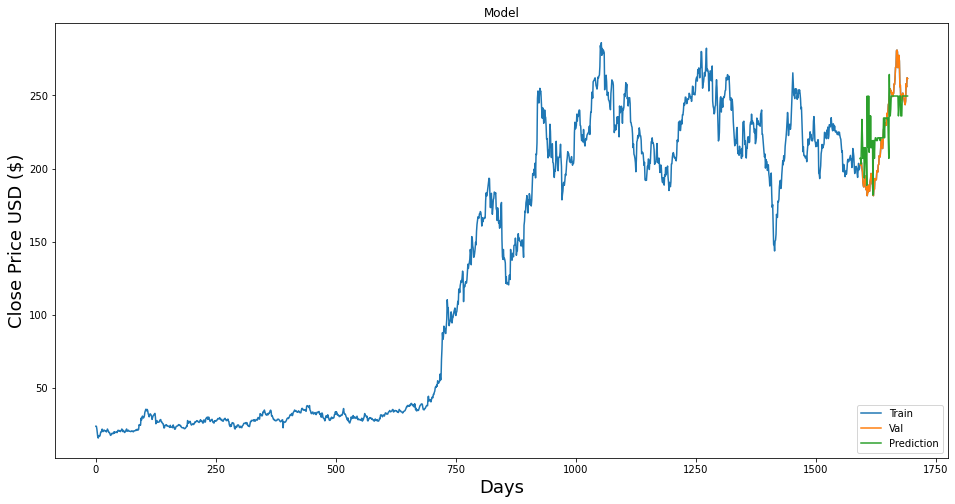

In [13]:
#Visualize the data
predictions = tree_prediction
#Plot the data
valid =  data[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(data['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()

Because this dataset spans so many days, it would be easier to see the predictions in comparison to the validation data by graphing beginning at day 1400.

<ipython-input-14-e23b0227a163>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices


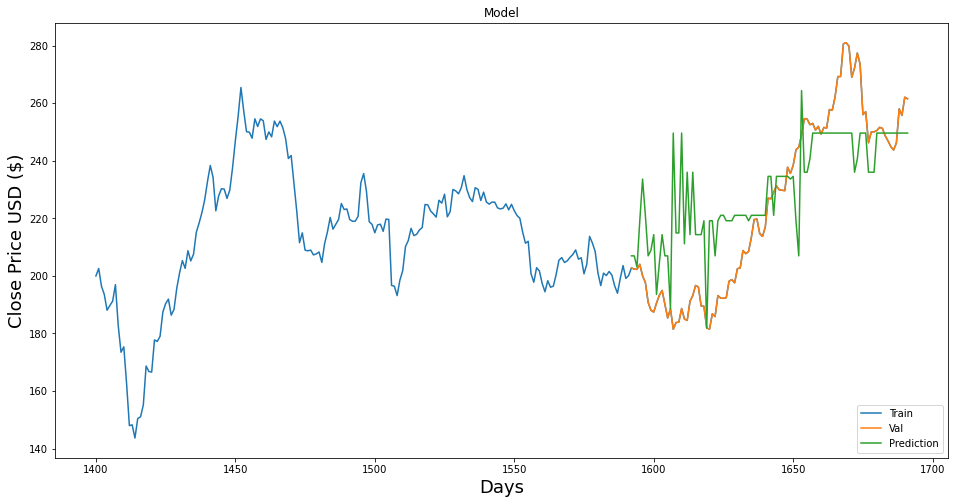

In [14]:
#Visualize the data
predictions = tree_prediction
#Plot the data
valid =  data[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(data['Close'][1400:])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()

As you can see, the predictions varied greatly from the validation data. As a result, I don't think this decision tree regressor is an adequate way to predict closing prices for stocks. 

I think one way I could improve this is by building a model that instead simply predicts whether the stock price will go up or down. After all, when it comes to buying and trading stocks, the first priority is to understand in which direction the stock price will go, and only then  the question of "by how much" can be addressed. 

#### Resources consulted 

0. [Predicting Stock Prices in Python](https://randerson112358.medium.com/predict-stock-prices-using-machine-learning-python-f554b7167b36)